In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_excel("C:/Users/MOHAM/Downloads/Compressed/archive_2/Cars Datasets 2025.xlsx")

In [42]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity.1,HorsePower.1.1,Total Speed.1,Performance(0 - 100 )KM/H.1,Cars Prices,Fuel Types,Seats,Torque.1
0,FERRARI,SF90 STRADALE,V8,3990,963,340,2.5,1100000.0,plug in hyrbrid,2.0,800
1,ROLLS ROYCE,PHANTOM,V12,6749,563,250,5.3,460000.0,Petrol,5.0,900
2,Ford,KA+,1.2L Petrol,1200,70,165,10.5,13000.0,Petrol,5.0,100
3,MERCEDES,GT 63 S,V8,3982,630,250,3.2,161000.0,Petrol,4.0,900
4,AUDI,AUDI R8 Gt,V10,5204,602,320,3.6,253290.0,Petrol,2.0,560


In [43]:
corr=df.select_dtypes(include='number').corr()

<Axes: >

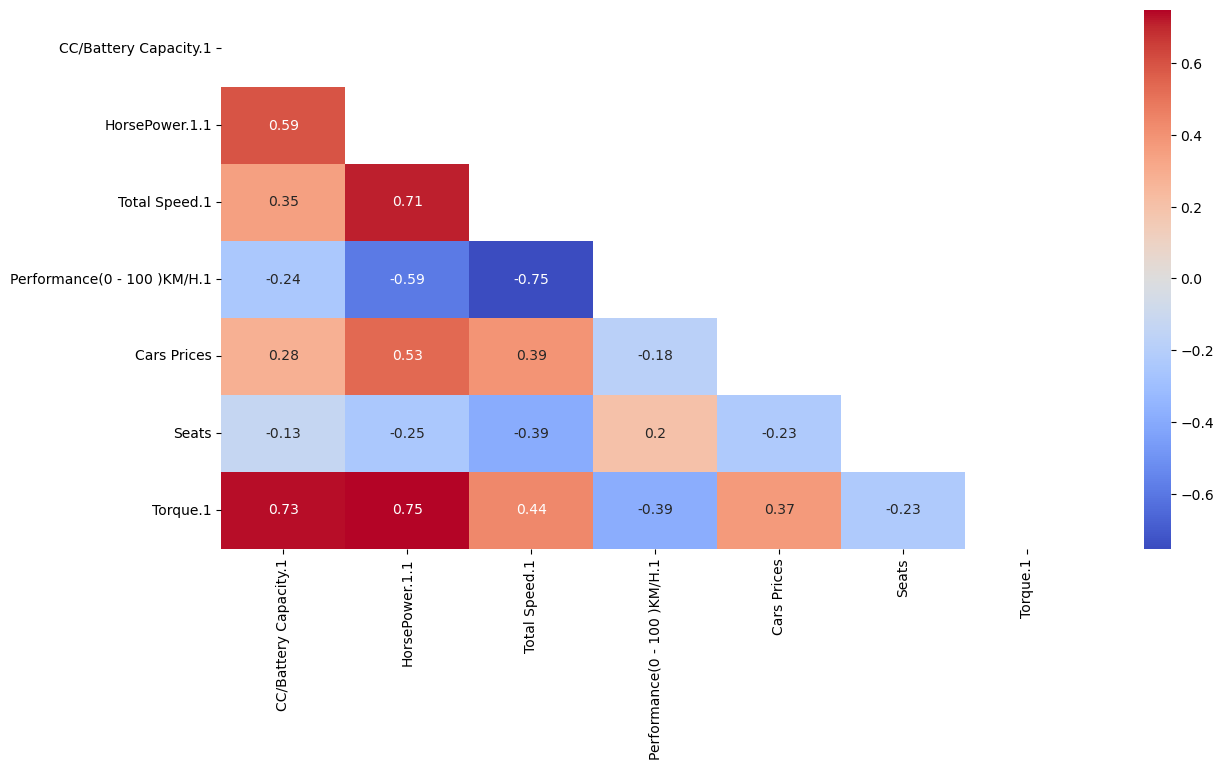

In [44]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(corr))

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm= LinearRegression()
lm

LinearRegression()

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# دالة تنظف الأعمدة من الرموز والوحدات
def clean_numeric(series):
    return (
        series.astype(str)
        .str.replace('[^0-9.]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )

# الأعمدة اللي هندرب بيها
cols = ['CC/Battery Capacity.1', 'HorsePower.1.1', 'Total Speed.1', 'Performance(0 - 100 )KM/H.1']

# تنظيف كل الأعمدة المحددة
for col in cols:
    df[col] = clean_numeric(df[col])

# تنظيف الأسعار وتحويلها لأرقام
df['Cars Prices'] = clean_numeric(df['Cars Prices'])
df = df.dropna(subset=cols + ['Cars Prices'])


In [66]:
z= df[['CC/Battery Capacity.1','HorsePower.1.1','Total Speed.1','Performance(0 - 100 )KM/H.1']]

In [67]:
lm.fit(z, df['Cars Prices'])

LinearRegression()

In [68]:
price_predict = lm.predict(z)

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12464\1517601808.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Cars Prices'], hist= False, color='r', label='Actual Value')
C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12464\1517601808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

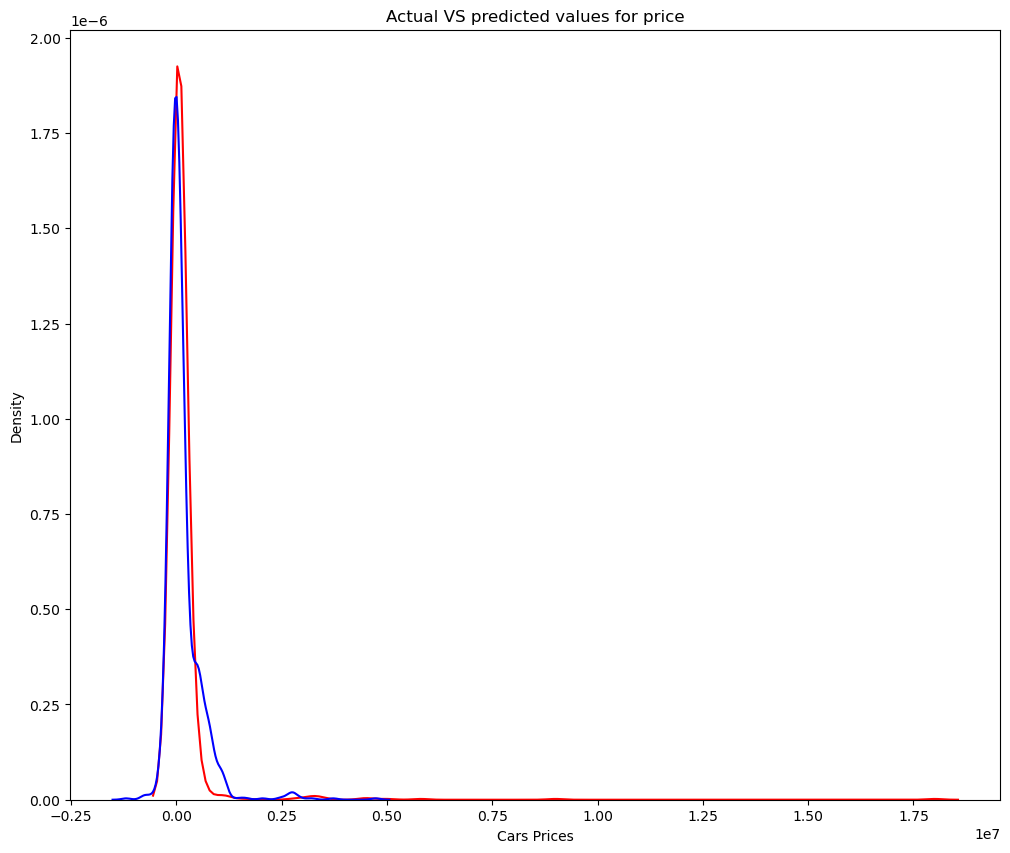

In [70]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['Cars Prices'], hist= False, color='r', label='Actual Value')
sns.distplot(price_predict, hist = False, color='b', label='predicted values', ax=ax1)

plt.title('Actual VS predicted values for price')
plt.xlable('price')
plt.ylable('Proportion of Cars')

plt.show()
plt.close()